In [1]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

In [2]:
dim  = 2    # system dimension (x,y)
nums = 1000 # number of steps
R    = np.zeros(dim) # particle position
V    = np.zeros(dim) # particle velocity
Rs   = np.zeros([dim,nums]) # particle position (at all steps)
Vs   = np.zeros([dim,nums]) # particle velocity (at all steps)
Et   = np.zeros(nums) # total enegy of the system (at all steps)
time = np.zeros(nums) # time (at all steps)

In [4]:
def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title
def animate(i): # define amination
    global R,V,F,Rs,Vs,time,Et
    V = V*(1-zeta/m*dt)-k/m*dt*R # Euler method Eq.(B4)
    R = R + V*dt                 # Euler method Eq.(B3) 
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])      # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

In [3]:
def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

def animate(i): # define amination
    global R,V,F,Rs,Vs,time,Et
    # Euler method Eqs.(B3) and (B4)
    V = V*(1-zeta/m*dt)-k/m*dt*np.linalg.norm(R)**2*R
    R = R + V*dt 
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.25*k*np.linalg.norm(R)**4
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

<IPython.core.display.Javascript object>


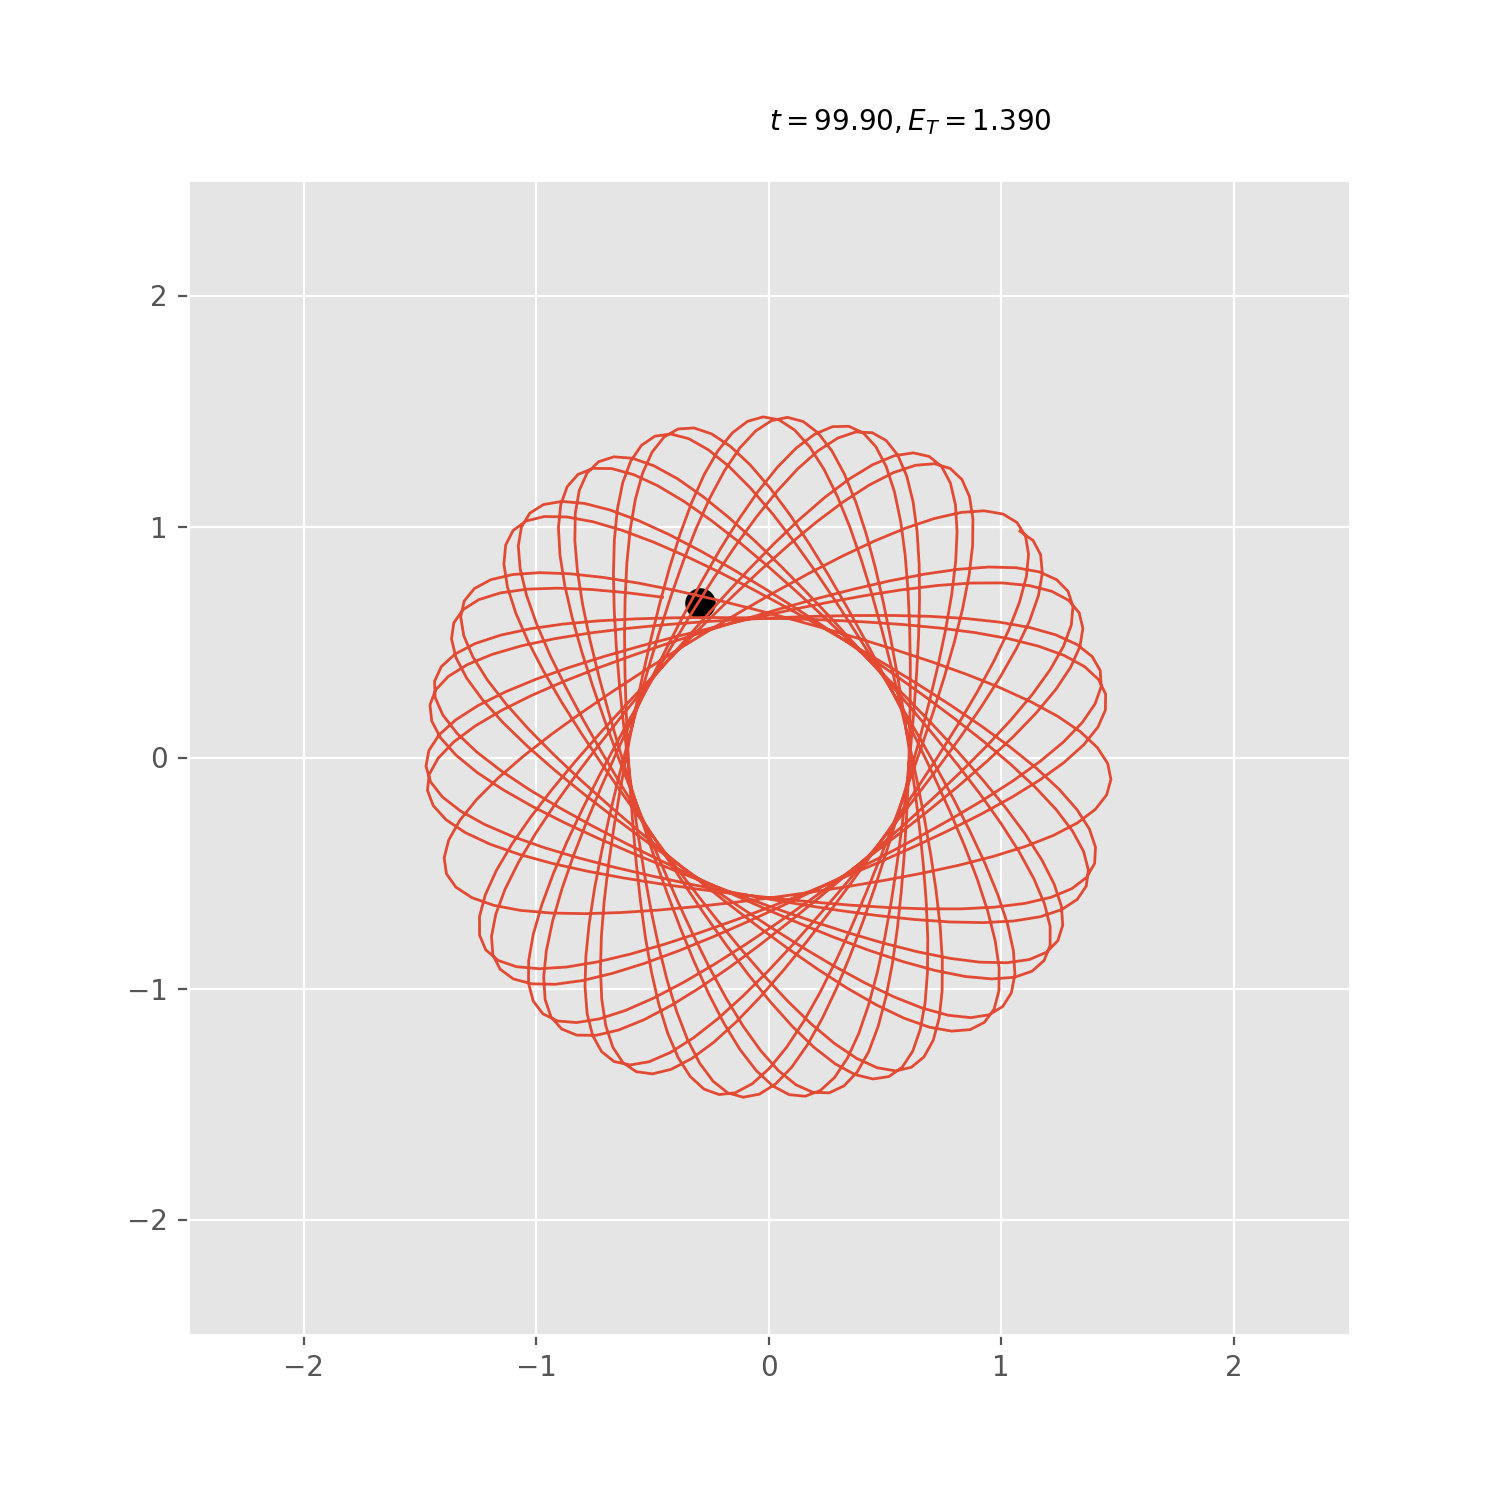

In [5]:
# System parameters
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0
# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt   = 0.1*np.sqrt(k/m) # set \Delta t
box  = 5 # set size of draw area
# set up the figure, axis, and plot element for animatation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([],[],'ko', ms=10) # setup plot for particle 
line,=ax.plot([],[],lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title
anim=animation.FuncAnimation(fig,animate,init_func=init,
     frames=nums,interval=5,blit=True,repeat=False) # draw animation
# anim.save('movie.mp4',fps=20,dpi=400)

<IPython.core.display.Javascript object>


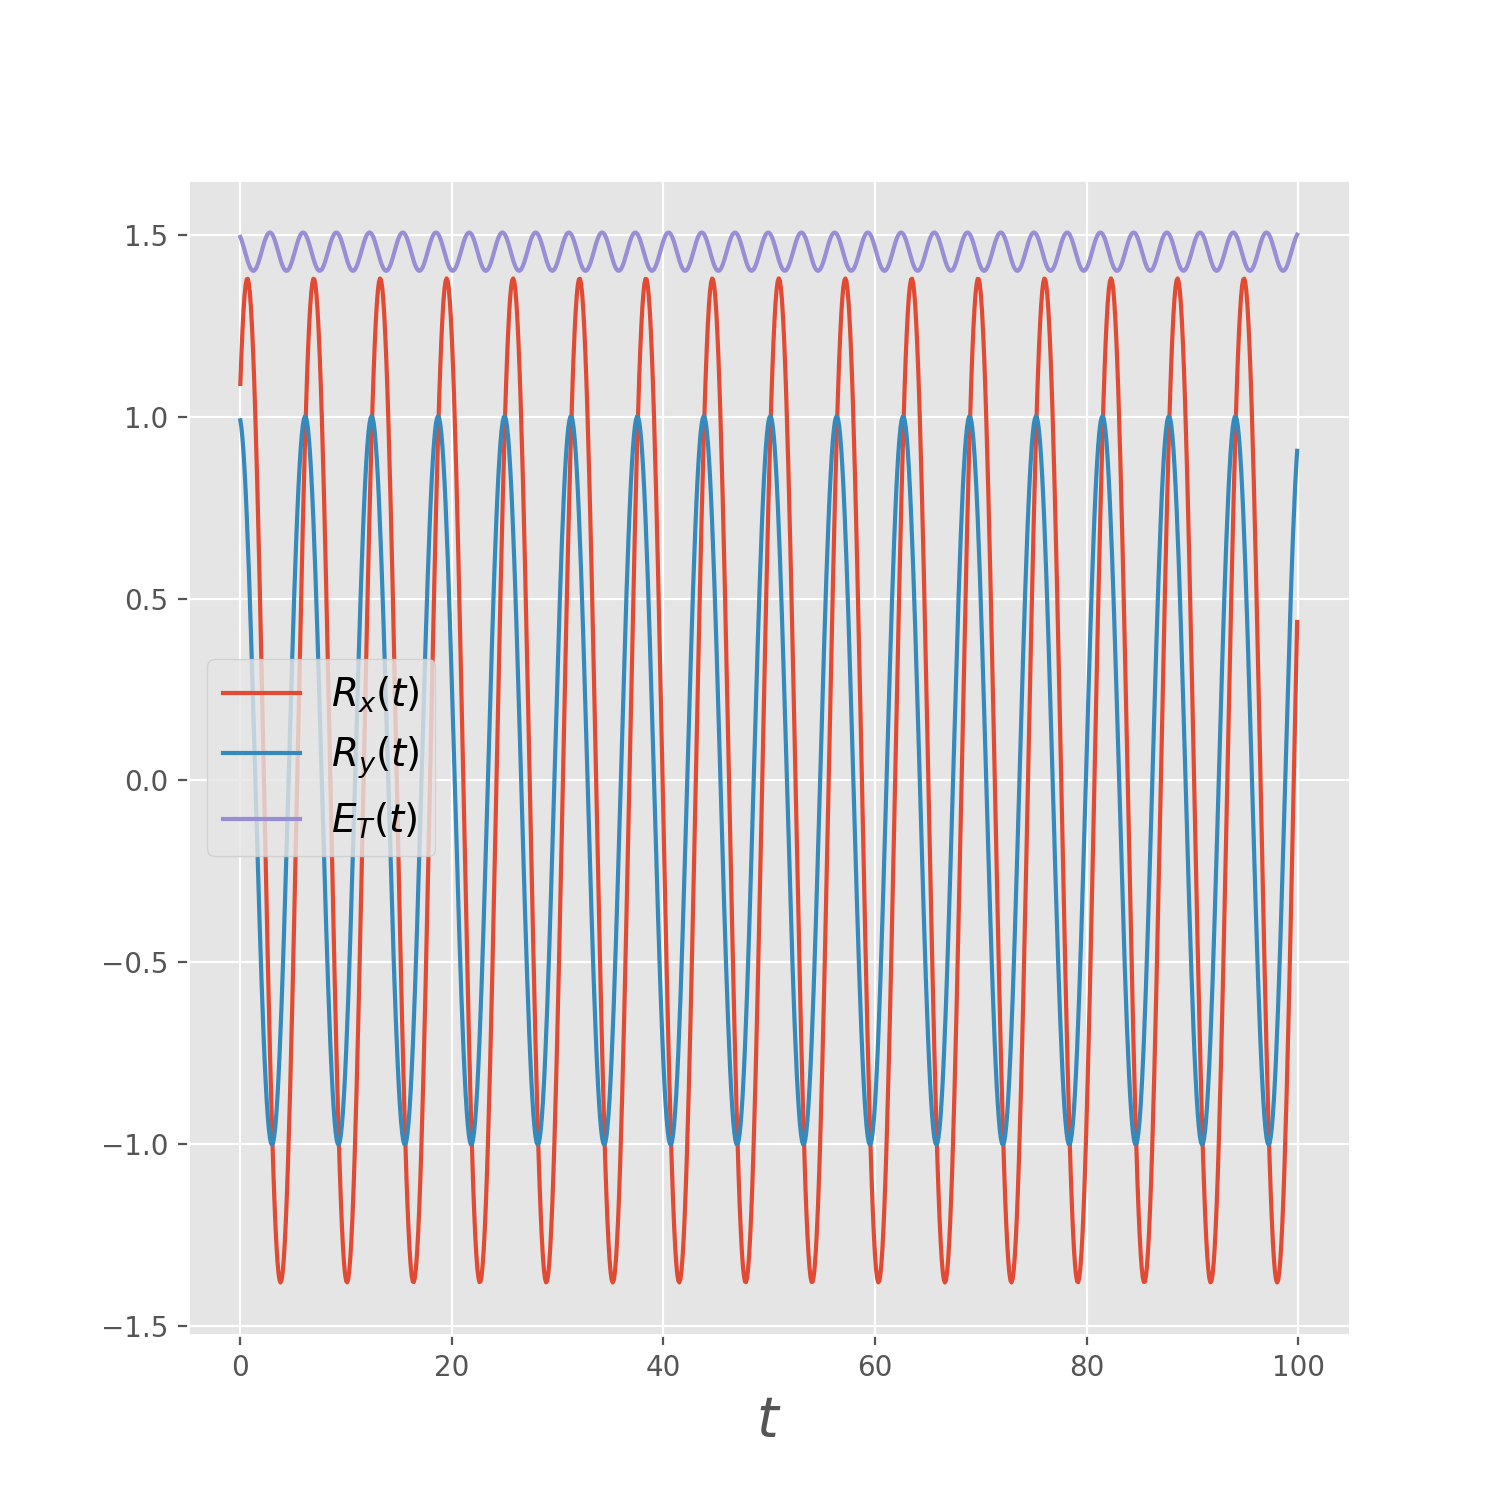

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


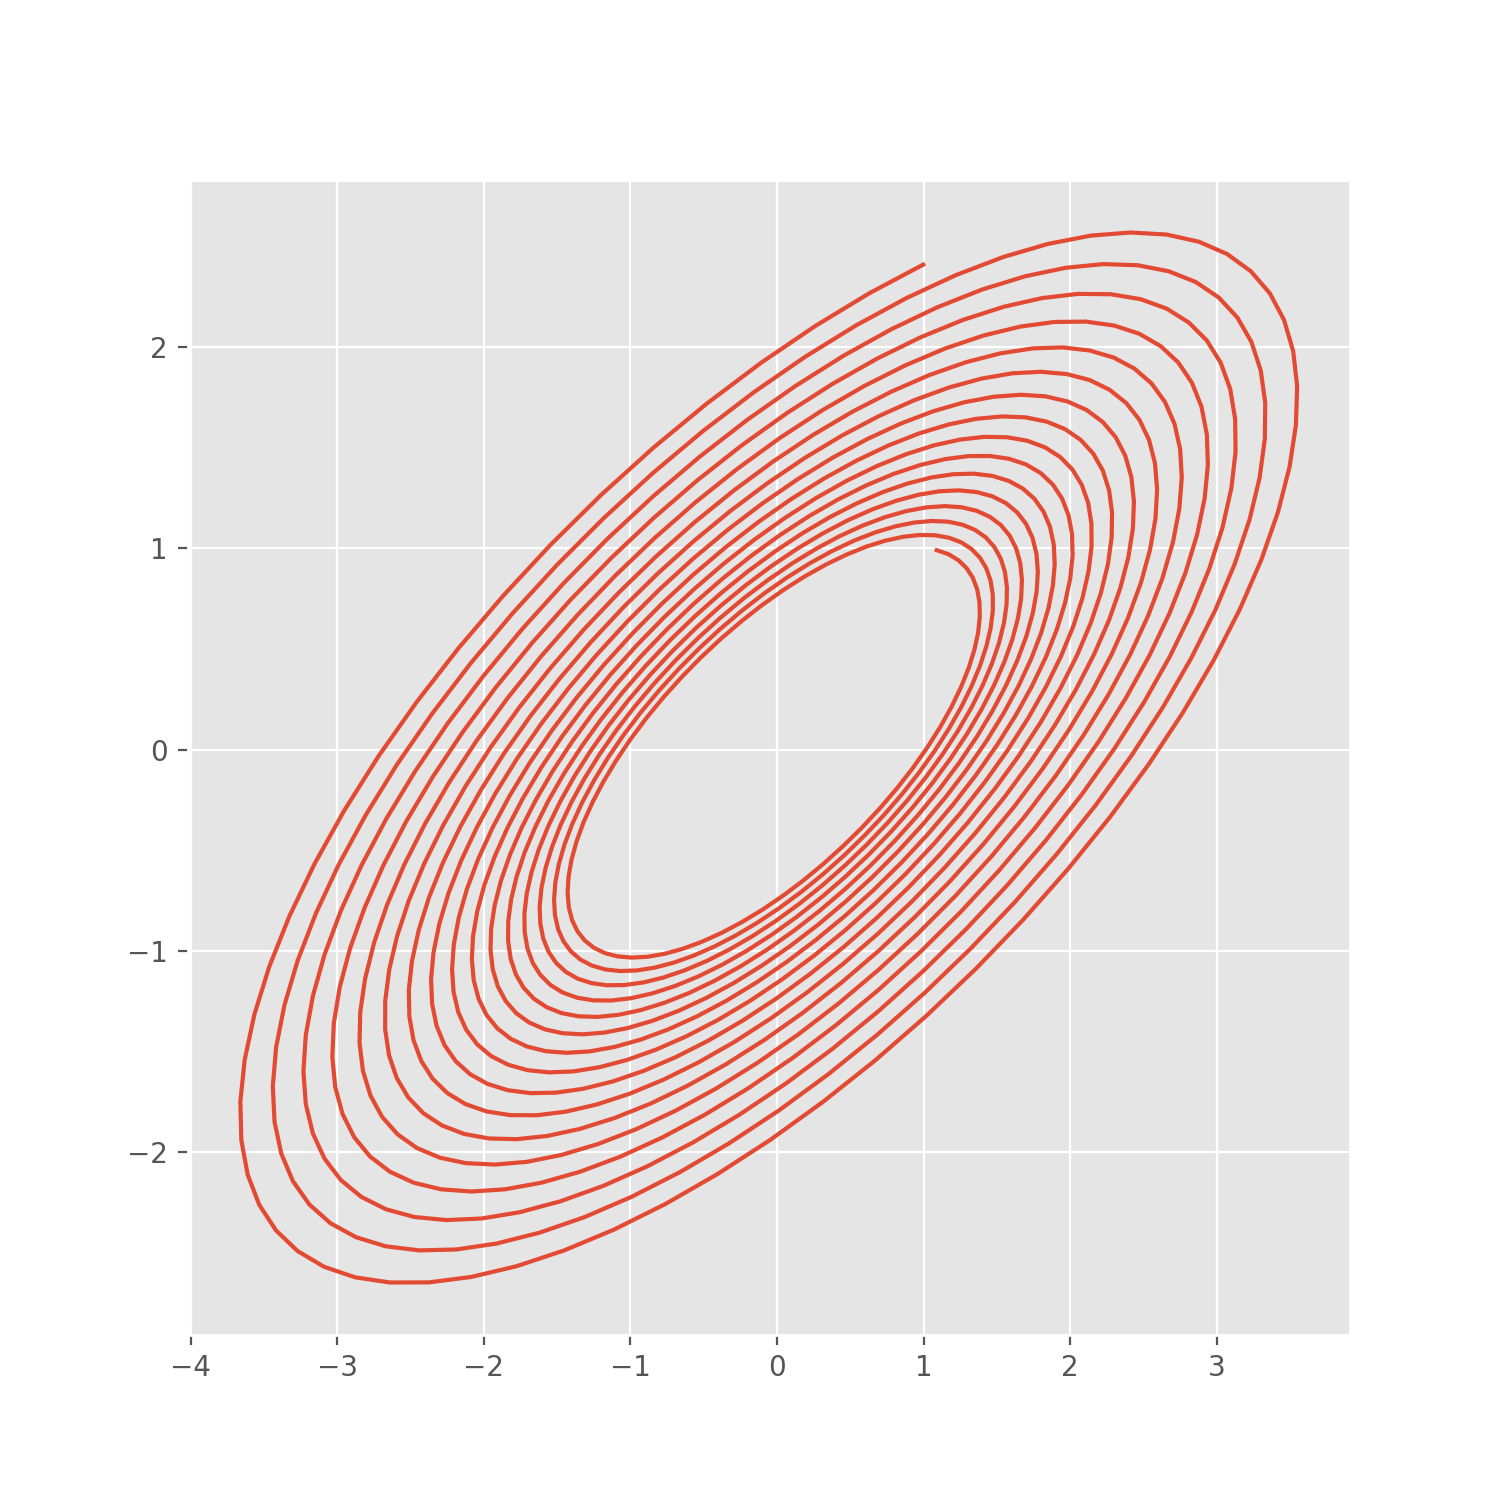

In [8]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(Rs[0,0:nums],Rs[1,0:nums]) # parameteric plot Rx(t) vs. Ry(t)
plt.show()

## Homework

1. Perform the simulation using the Euler method with $m=1$, $k=1$, $\zeta=1$, $\mathbf{R}_0=(1,1)$, and $\mathbf{V}_0=(1.0)$. Then plot 
$E_T(t)$ vs. $t$ and $R_x(t)$ vs. $R_y(t)$.

1. Replace the harmonic spring $\mathbf{F}_{\rm spring}=-k\mathbf{R}$ with an unharmonic spring $\mathbf{F}_{\rm spring}=-kR^2\mathbf{R}$. Then perform a simulation using the same parameters to the previous problem but with $\zeta=0$, and plot $E_T(t)$ vs. $t$ where the total energy of this unharmonic oscillator is given below.

$$
E_T(t)= \frac{1}{2}m\mathbf{V}^2(t)+\frac{1}{4}k\mathbf{R}^4(t)
$$

1. Perform simulations of harmonic spring with $\zeta=0$ using the Runge-Kutta (2nd order) method by modifing the code example for the Euler method. Then plot $E_T(t)$ vs. $t$ and compare it with the result using the Euler method, and summerize the comparison.

1. Perform the same analysis using the Runge-Kutta (4th order) method, and summerize the comparison.

In [23]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

In [24]:
dim  = 2    # system dimension (x,y)
nums = 1000 # number of steps
R    = np.zeros(dim) # particle position
V    = np.zeros(dim) # particle velocity
time = np.zeros(nums) # time (at all steps)
def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

<IPython.core.display.Javascript object>


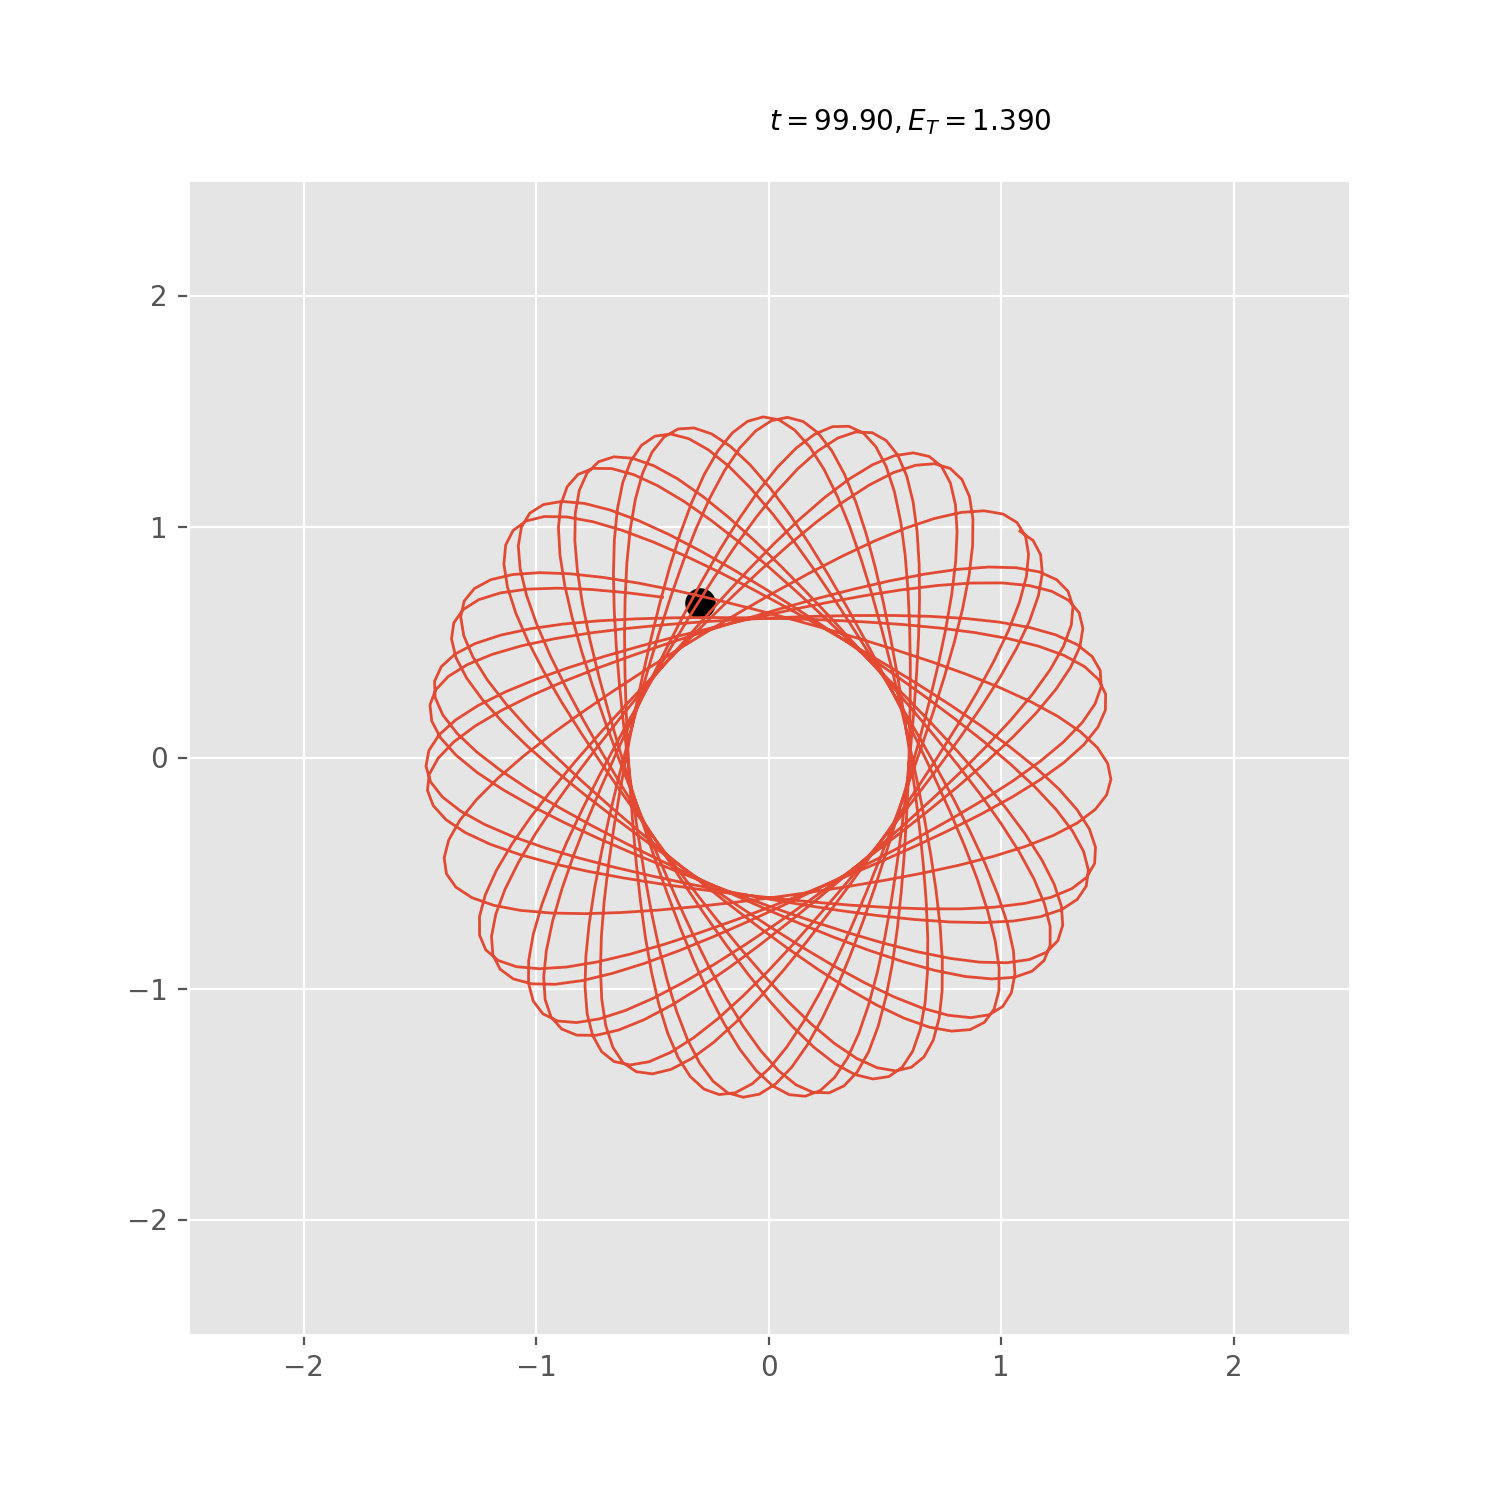

In [27]:
## unharmonic spring
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0
dt   = 0.1*np.sqrt(k/m) # set \Delta t
# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
Rs_uh   = np.zeros([dim,nums]) # particle position (at all steps)
Vs_uh   = np.zeros([dim,nums]) # particle velocity (at all steps)
Et_uh   = np.zeros(nums) # total enegy of the system (at all steps)
def animate_uh(i): # define amination
    global R,V,F,Rs_uh,Vs_uh,time,Et_uh
    # Euler method Eqs.(B3) and (B4)
    V = V*(1-zeta/m*dt)-k/m*dt*np.linalg.norm(R)**2*R
    R = R + V*dt 
    Rs_uh[0:dim,i]=R
    Vs_uh[0:dim,i]=V
    time[i]=i*dt
    Et_uh[i]=0.5*m*np.linalg.norm(V)**2+0.25*k*np.linalg.norm(R)**4
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs_uh[0,0:i], Rs_uh[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et_uh[i]))
    return particles,line,title
box  = 5 # set size of draw area
# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax=plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([], [], 'ko', ms=10) # setup plot for particle 
line,=ax.plot([], [], lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title
anim=animation.FuncAnimation(fig,animate_uh,init_func=init,
     frames=nums,interval=5,blit=True,repeat=False) # draw animation

<IPython.core.display.Javascript object>


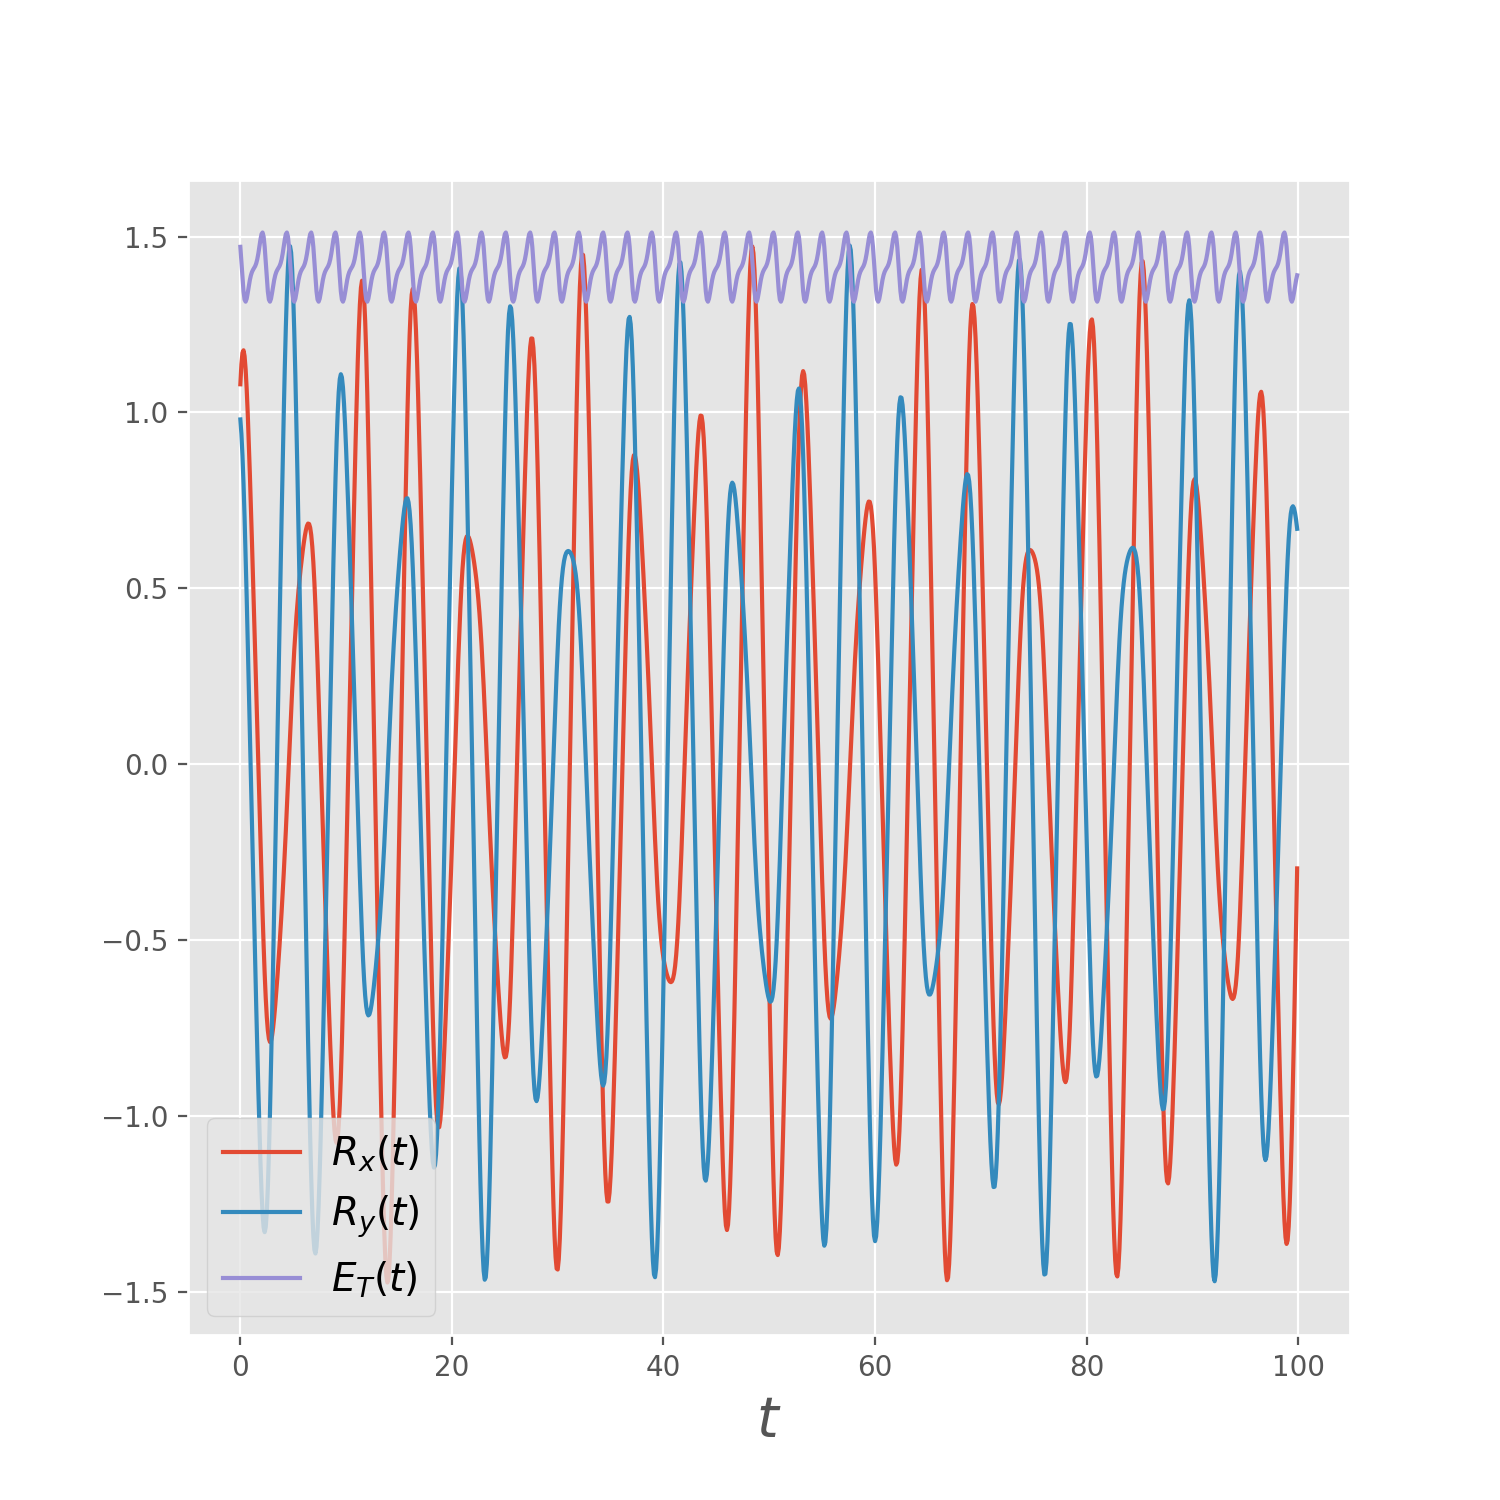

In [28]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs_uh[0]) # plot R_x(t)
ax.plot(time,Rs_uh[1]) # plot R_y(t)
ax.plot(time,Et_uh) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


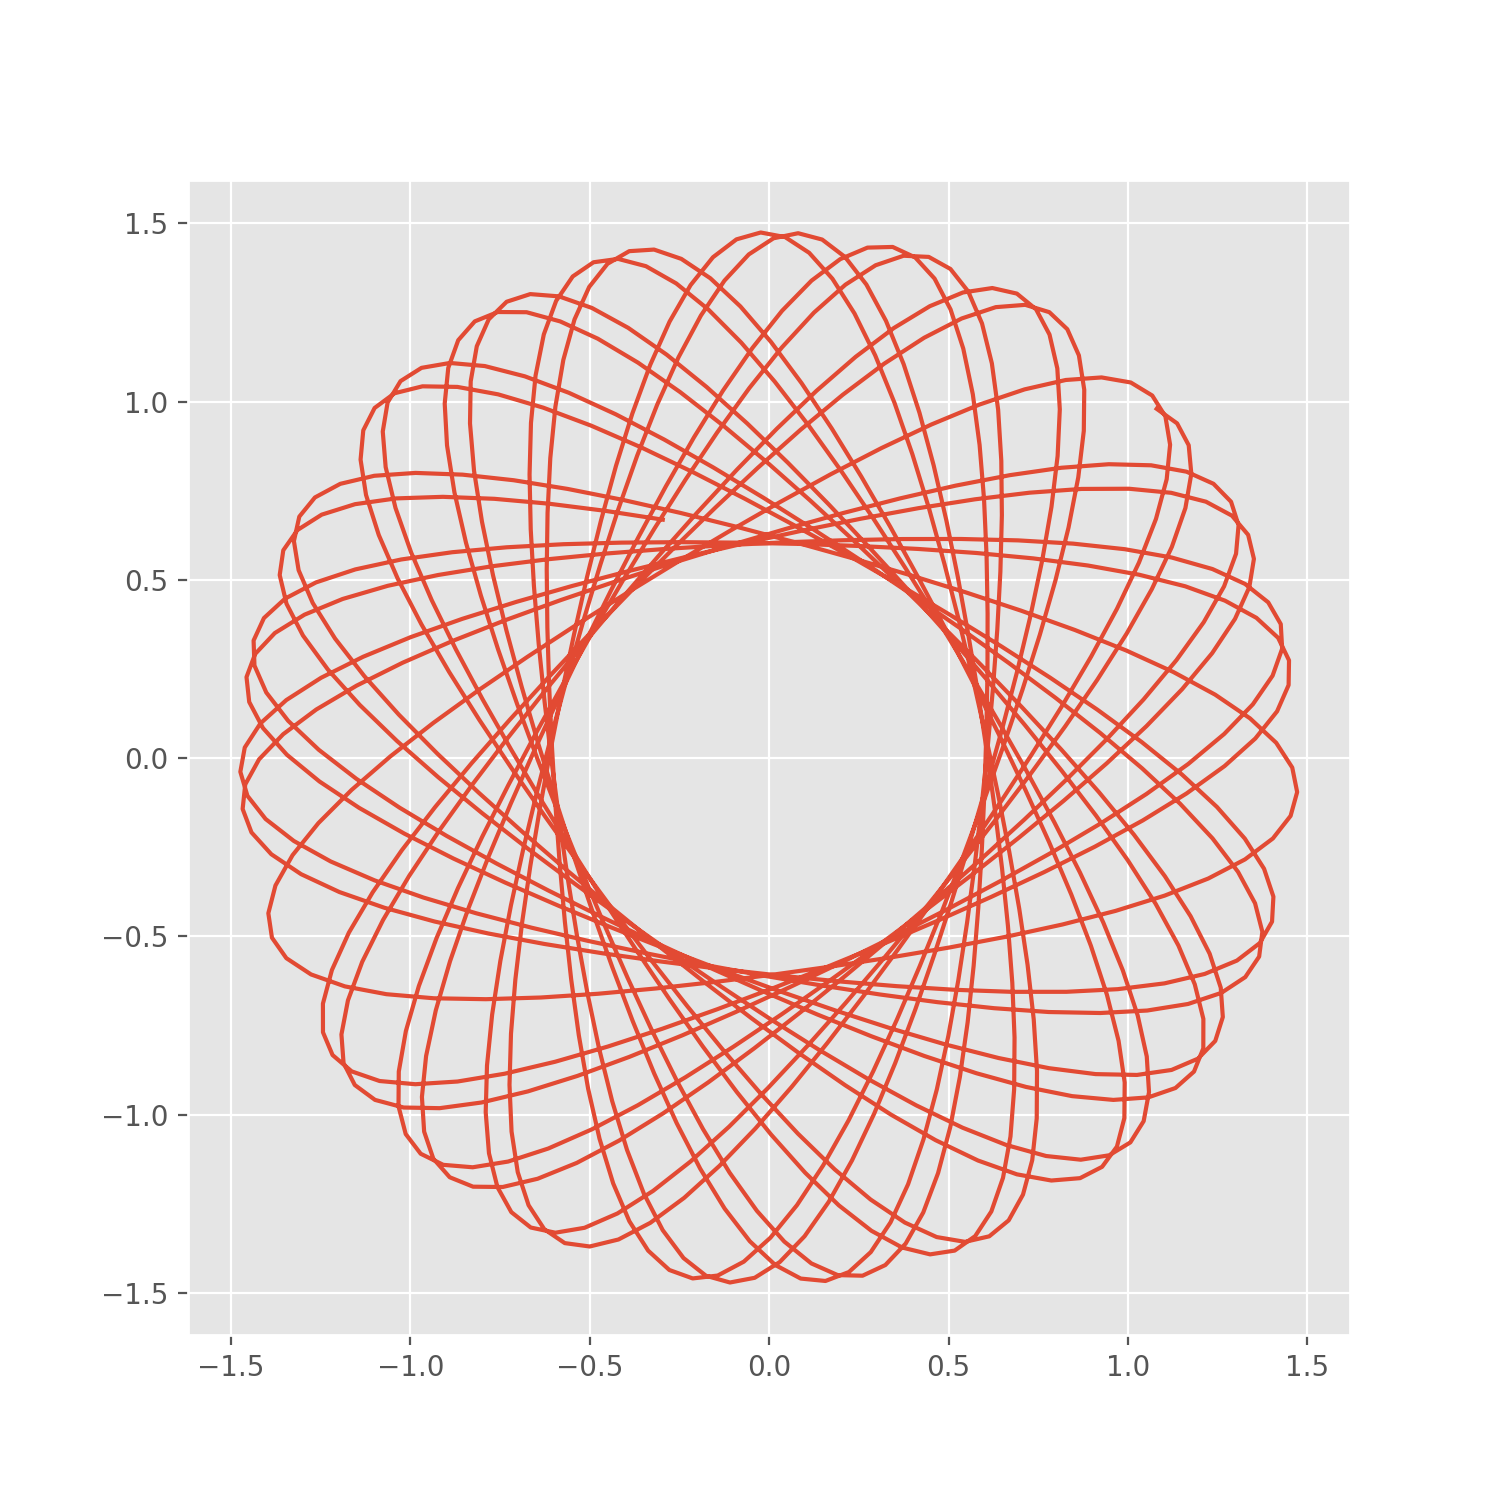

In [30]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(Rs_uh[0,0:nums],Rs_uh[1,0:nums]) # parameteric plot Rx(t) vs. Ry(t)
plt.show()

<IPython.core.display.Javascript object>


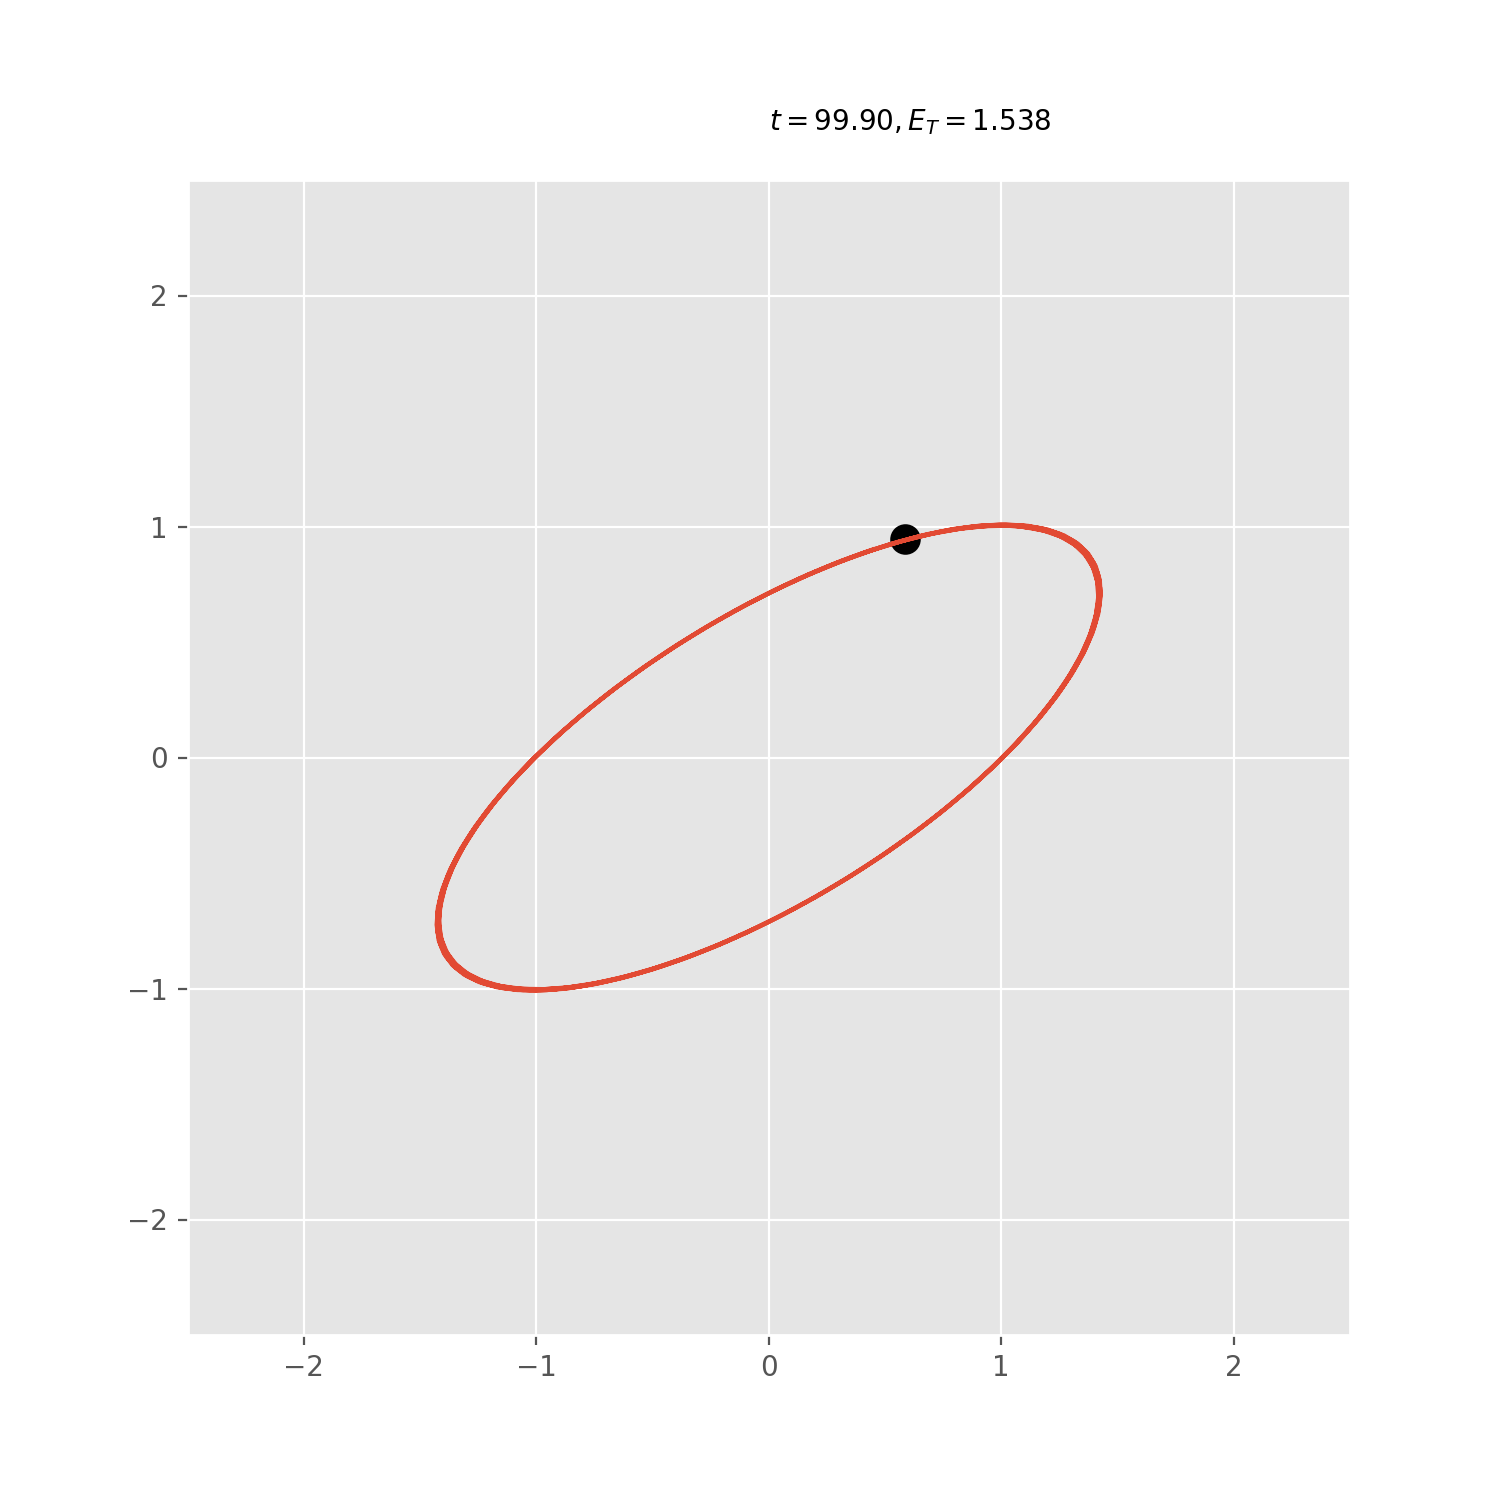

In [11]:
## harmonic spring with RK 2nd order method
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0
dt   = 0.1*np.sqrt(k/m) # set \Delta t
# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
R1    = np.zeros(dim) # intermadiate position1
V1    = np.zeros(dim) # intermediate velocity1
Rs_rk2   = np.zeros([dim,nums]) # particle position (at all steps)
Vs_rk2   = np.zeros([dim,nums]) # particle velocity (at all steps)
Et_rk2   = np.zeros(nums) # total enegy of the system (at all steps)
def animate_rk2(i): # define amination
    global R,V,F,Rs_rk2,Vs_rk2,time,Et_rk2
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R # RK 2nd
    R1 = R + V*0.5*dt # RK 2nd
    V = V - V1*zeta/m*dt - k/m*dt*R1 # RK 2nd
    R = R + V1*dt # RK 2nd
    Rs_rk2[0:dim,i]=R
    Vs_rk2[0:dim,i]=V
    time[i]=i*dt
    Et_rk2[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs_rk2[0,0:i], Rs_rk2[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et_rk2[i]))
    return particles,line,title
box  = 5 # set size of draw area
# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax=plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([], [], 'ko', ms=10) # setup plot for particle 
line,=ax.plot([], [], lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title
anim=animation.FuncAnimation(fig,animate_rk2,init_func=init,
     frames=nums,interval=5,blit=True,repeat=False) # draw animation

<IPython.core.display.Javascript object>


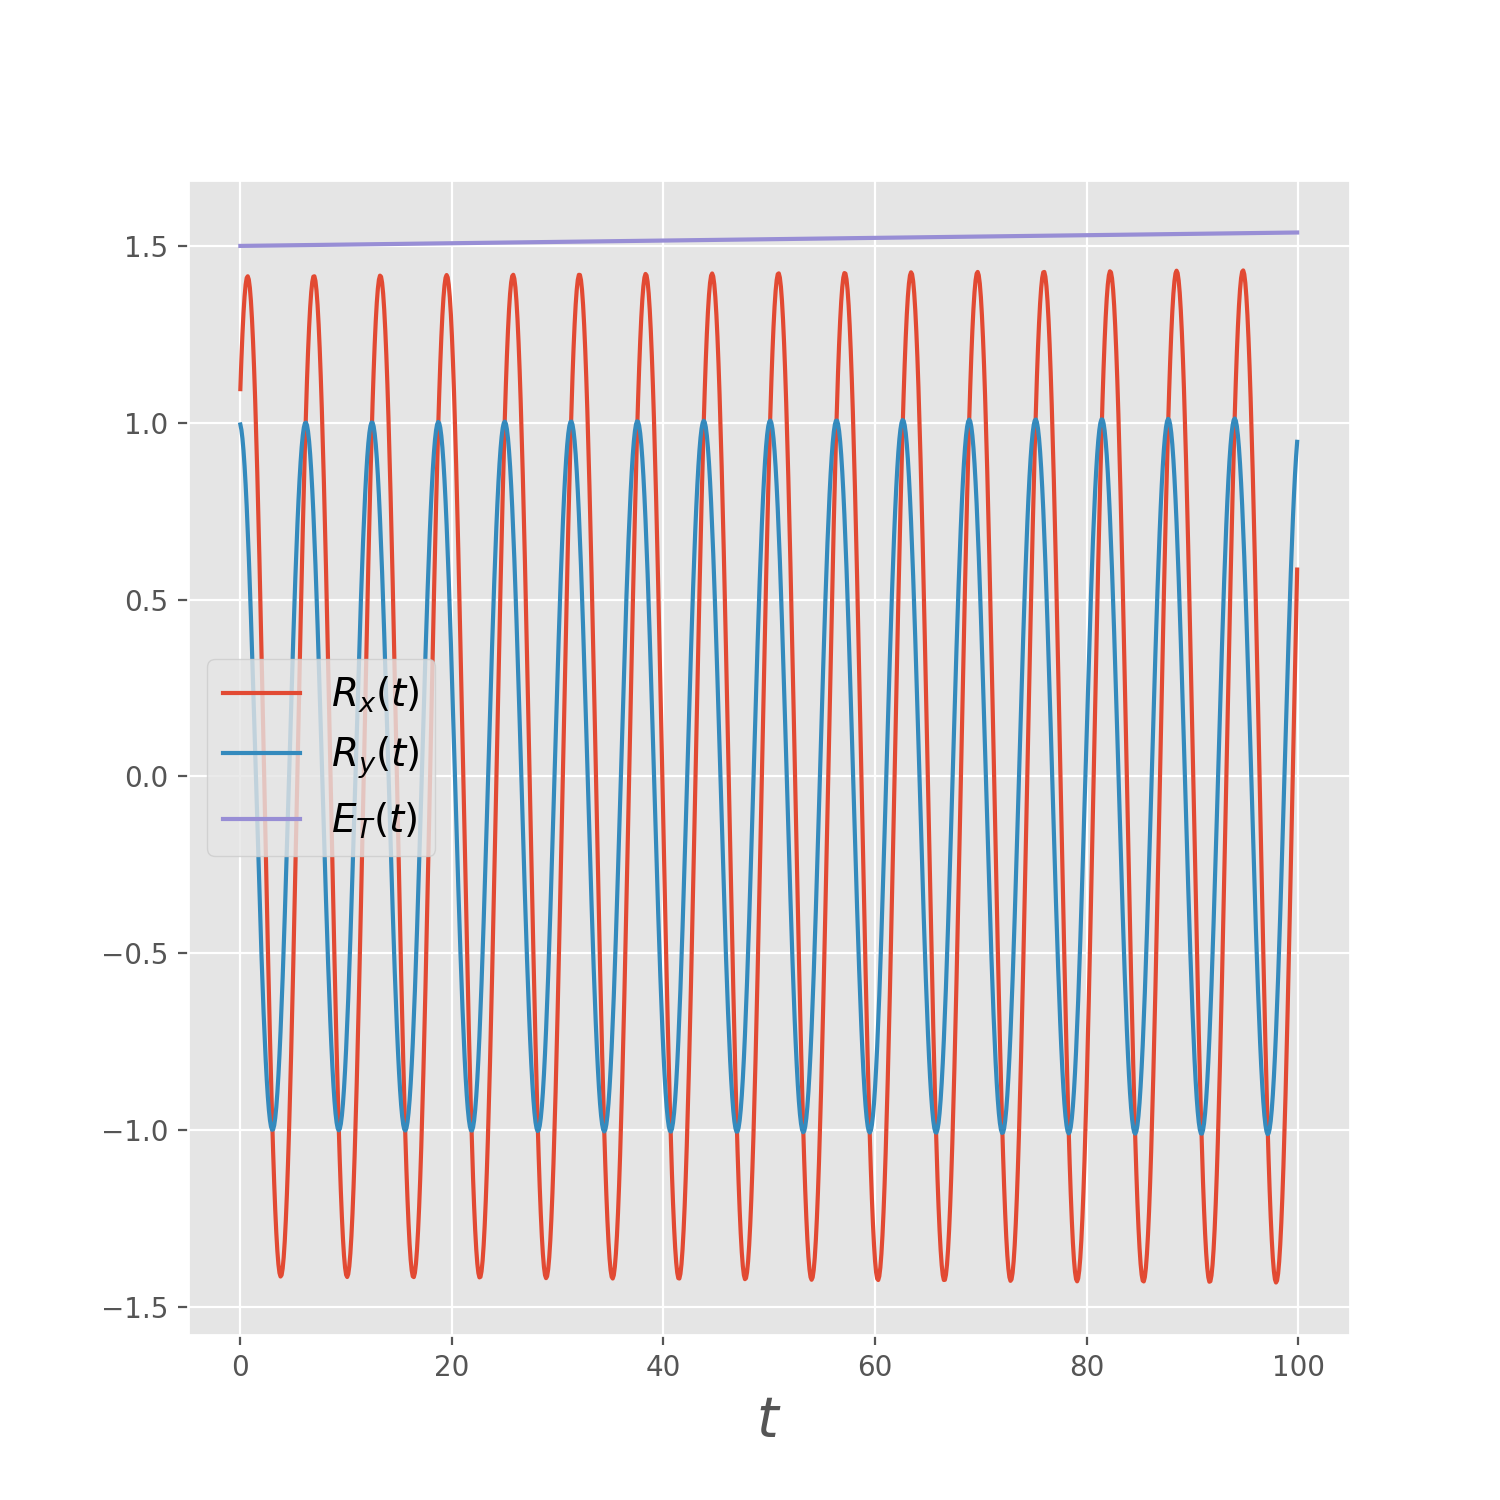

In [12]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs_rk2[0]) # plot R_x(t)
ax.plot(time,Rs_rk2[1]) # plot R_y(t)
ax.plot(time,Et_rk2) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


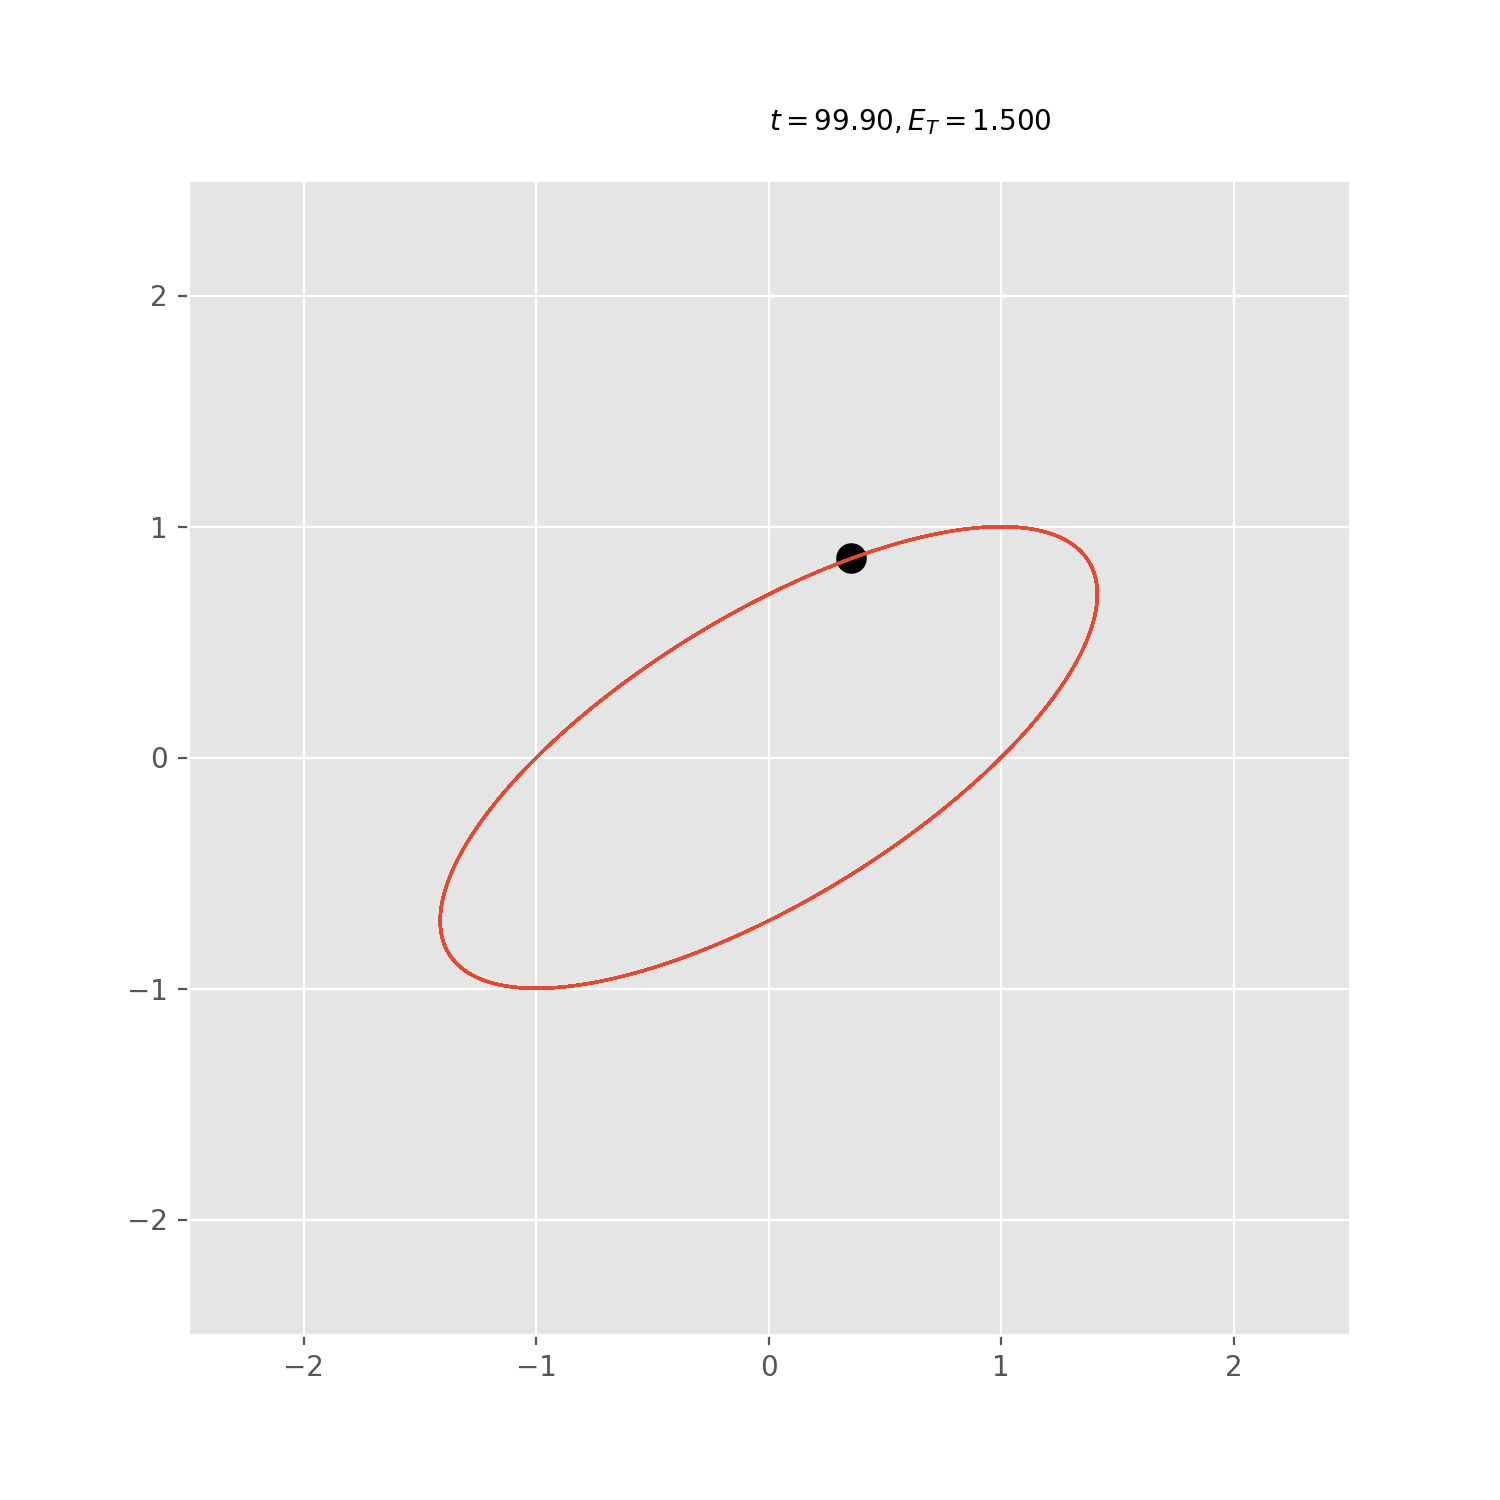

In [13]:
## harmonic spring with RK 4th order method
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0
dt   = 0.1*np.sqrt(k/m) # set \Delta t
# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
R1    = np.zeros(dim) # intermadiate position1
V1    = np.zeros(dim) # intermediate velocity1
R2    = np.zeros(dim) # intermadiate position2
V2    = np.zeros(dim) # intermediate velocity2
R3    = np.zeros(dim) # intermadiate position3
V3    = np.zeros(dim) # intermediate velocity3
R4    = np.zeros(dim) # intermadiate position3
V4    = np.zeros(dim) # intermediate velocity3
Rs_rk4   = np.zeros([dim,nums]) # particle position (at all steps)
Vs_rk4   = np.zeros([dim,nums]) # particle velocity (at all steps)
Et_rk4   = np.zeros(nums) # total enegy of the system (at all steps)
def animate_rk4(i): # define amination
    global R,V,F,Rs_rk4,Vs_rk4,time,Et_rk4
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R # RK 4th
    R1 = R + V*0.5*dt # RK 4th
    V2 = V - zeta/m*0.5*dt*V1 - k/m*0.5*dt*R1 # RK 4th
    R2 = R + V1*0.5*dt # RK 4th
    V3 = V - zeta/m*dt*V2 - k/m*dt*R2 # RK 4th
    R3 = R + V2*dt # RK 4th
    V4 = V - (V+V1*2+V2*2+V3)/6.*zeta/m*dt - k/m*dt*(R+R1*2+R2*2+R3)/6. # Euler method Eq.(B4)
    R4 = R + (V+V1*2+V2*2+V3)/6.*dt 
    R  = R4
    V  = V4
    Rs_rk4[0:dim,i]=R
    Vs_rk4[0:dim,i]=V
    time[i]=i*dt
    Et_rk4[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs_rk4[0,0:i], Rs_rk4[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et_rk4[i]))
    return particles,line,title
box  = 5 # set size of draw area
# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax=plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([], [], 'ko', ms=10) # setup plot for particle 
line,=ax.plot([], [], lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title
anim=animation.FuncAnimation(fig,animate_rk4,init_func=init,
     frames=nums,interval=5,blit=True,repeat=False) # draw animation

<IPython.core.display.Javascript object>


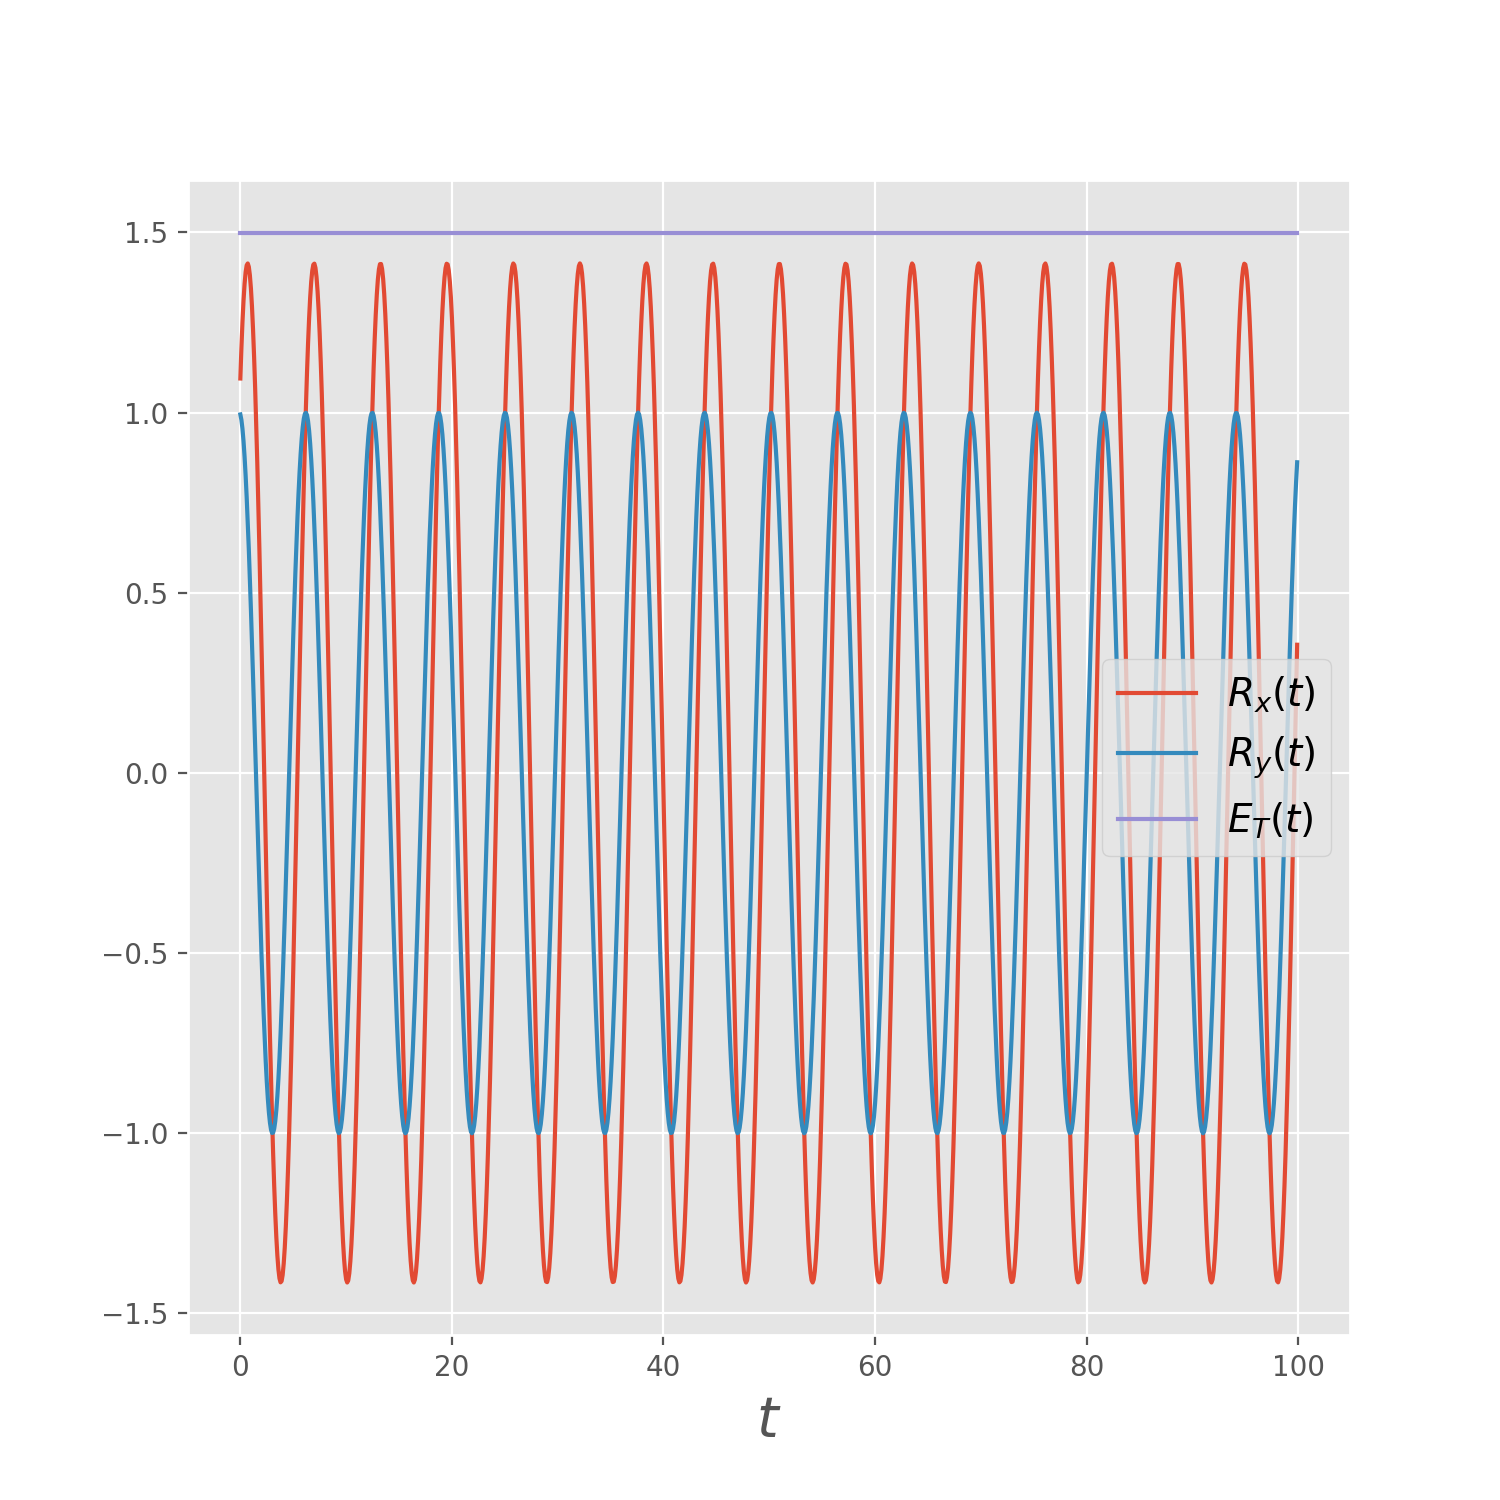

In [15]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs_rk4[0]) # plot R_x(t)
ax.plot(time,Rs_rk4[1]) # plot R_y(t)
ax.plot(time,Et_rk4) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()